<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkST0151ENSkillsNetwork20531532-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>



# Project Case: Boston Housing Data

### Task 1: Become familiar with the dataset

### Task 2: Generate Descriptive Statistics and Visualizations
* For all visualizations, please include a title in each graph and appropriate labels

***Generate the following and explain your findings:***

* For the "Median value of owner-occupied homes" provide a boxplot

* Provide a  bar plot for the Charles river variable

* Provide a boxplot for the MEDV variable vs the AGE variable. (Discretize the age variable into three groups of 35 years and younger, between 35 and 70 years and 70 years and older)

* Provide a scatter plot to show the relationship between Nitric oxide concentrations and the proportion of non-retail business acres per town. What can you say about the relationship?

* Create a histogram for the pupil to teacher ratio variable

### Task 3: Use the appropriate tests to answer the questions provided.
***For each of the following questions:***

* Is there a significant difference in median value of houses bounded by the Charles river or not? (T-test for independent samples)

* Is there a difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE)? (ANOVA)

* Can we conclude that there is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town? (Pearson Correlation)

* What is the impact of an additional weighted distance  to the five Boston employment centres on the median value of owner occupied homes? (Regression analysis)

**_Be sure to:_**

* State your hypothesis.

* Use α = 0.05

* Perform the test Statistics.

* State the conclusion from the test.

#### Import the required libraries we need for the lab.


In [1]:
import piplite
await piplite.install(['numpy'],['pandas'])
await piplite.install(['seaborn'])

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import datetime
import scipy.stats
from statsmodels.formula.api import ols

<ipython-input-2-01bd3ecbfe74>:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


#### Read the dataset in the csv file from the URL


In [3]:
from js import fetch
import io

URL = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
resp = await fetch(URL)
boston_url = io.BytesIO((await resp.arrayBuffer()).to_py())

In [4]:
boston_df=pd.read_csv(boston_url)

#### Add your code below following the instructions given in the course to complete the peer graded assignment


## Task 1: Familiarizing with the dataset

In [5]:
# Visualizing the dataframe to understand the features and values
boston_df

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0
1,1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6
2,2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7
3,3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4
4,4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,9.67,22.4
502,502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,9.08,20.6
503,503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,5.64,23.9
504,504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,6.48,22.0


In [6]:
boston_df.columns

Index(['Unnamed: 0', 'CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS',
       'RAD', 'TAX', 'PTRATIO', 'LSTAT', 'MEDV'],
      dtype='object')

***The following describes the dataset variables:***

·      CRIM - per capita crime rate by town

·      ZN - proportion of residential land zoned for lots over 25,000 sq.ft.

·      INDUS - proportion of non-retail business acres per town.

·      CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)

·      NOX - nitric oxides concentration (parts per 10 million)

·      RM - average number of rooms per dwelling

·      AGE - proportion of owner-occupied units built prior to 1940

·      DIS - weighted distances to five Boston employment centres

·      RAD - index of accessibility to radial highways

·      TAX - full-value property-tax rate per $10,000

·      PTRATIO - pupil-teacher ratio by town

·      LSTAT - % lower status of the population

·      MEDV - Median value of owner-occupied homes in $1000's

In [7]:
boston_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  506 non-null    int64  
 1   CRIM        506 non-null    float64
 2   ZN          506 non-null    float64
 3   INDUS       506 non-null    float64
 4   CHAS        506 non-null    float64
 5   NOX         506 non-null    float64
 6   RM          506 non-null    float64
 7   AGE         506 non-null    float64
 8   DIS         506 non-null    float64
 9   RAD         506 non-null    float64
 10  TAX         506 non-null    float64
 11  PTRATIO     506 non-null    float64
 12  LSTAT       506 non-null    float64
 13  MEDV        506 non-null    float64
dtypes: float64(13), int64(1)
memory usage: 55.4 KB


In [8]:
# From the details above:
# First column Unnamed [0], is not really necessary (duplicated index with dataframe)
# We can either delete it or rename and index it.
# Choosing to rename and make it index.
# Also, there are no missing data.

df = boston_df.rename(columns={boston_df.columns[0]: 'ID'}).set_index('ID')

# Convert CHAS and RAD columns to integers

df[['CHAS', 'RAD']] = df[['CHAS', 'RAD']].astype(int)

df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
ID,,,,,,,,,,,,,
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273.0,21.0,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273.0,21.0,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273.0,21.0,5.64,23.9


## Task 2: Descriptive Statistics and Visualizations

### Descriptive Statistics

In [9]:
df.describe().round(2)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
count,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00
mean,3.61,11.36,11.14,0.07,0.55,6.28,68.57,3.80,9.55,408.24,18.46,12.65,22.53
std,8.60,23.32,6.86,0.25,0.12,0.70,28.15,2.11,8.71,168.54,2.16,7.14,9.20
min,0.01,0.00,0.46,0.00,0.38,3.56,2.90,1.13,1.00,187.00,12.60,1.73,5.00
25%,0.08,0.00,5.19,0.00,0.45,5.89,45.02,2.10,4.00,279.00,17.40,6.95,17.02
50%,0.26,0.00,9.69,0.00,0.54,6.21,77.50,3.21,5.00,330.00,19.05,11.36,21.20
75%,3.68,12.50,18.10,0.00,0.62,6.62,94.07,5.19,24.00,666.00,20.20,16.96,25.00
max,88.98,100.00,27.74,1.00,0.87,8.78,100.00,12.13,24.00,711.00,22.00,37.97,50.00


### Data Visualizations

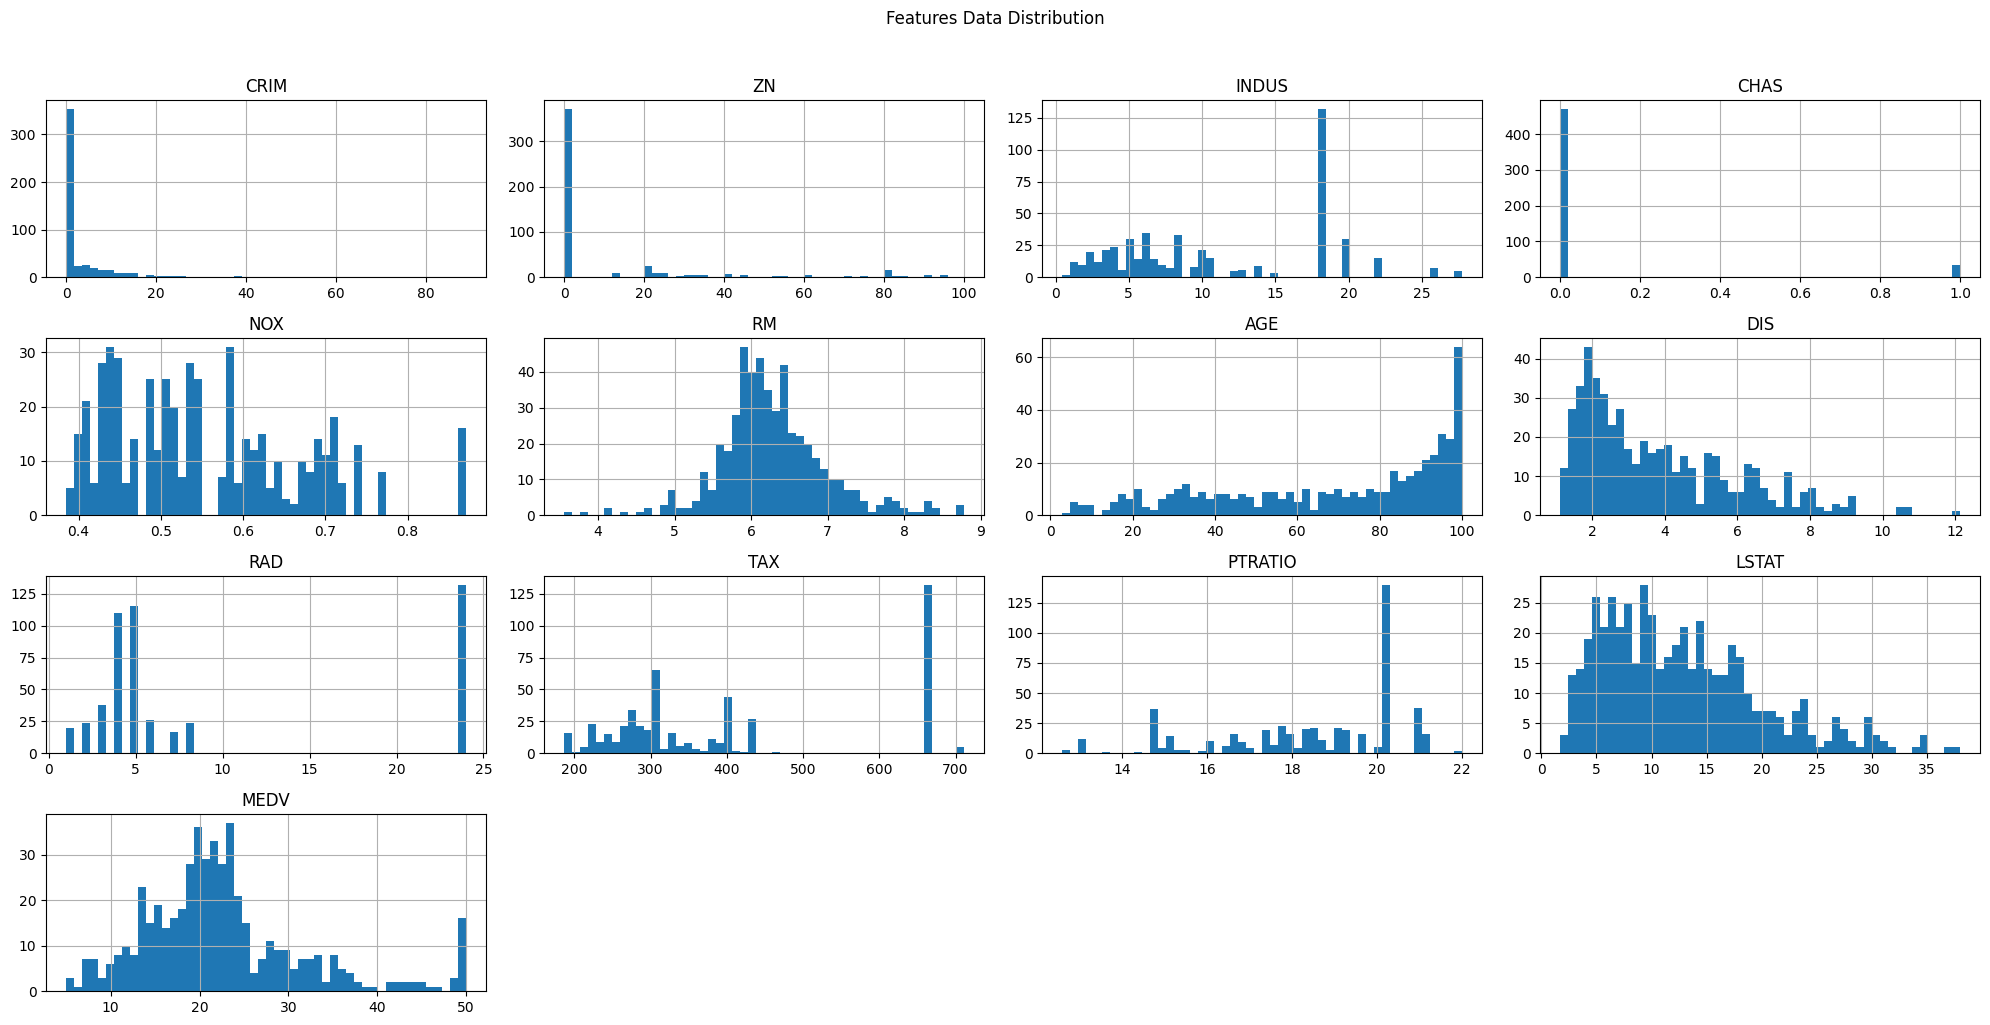

In [10]:
# Histogram to display the distribution of the data in each feature
df.hist(bins=50, figsize=(20,10))
plt.suptitle('Features Data Distribution', x=0.5, y=1.02, ha='center', fontsize='large')
plt.tight_layout()
plt.show()

### Boxplot showing median value (MEDV) of owner-occupied homes

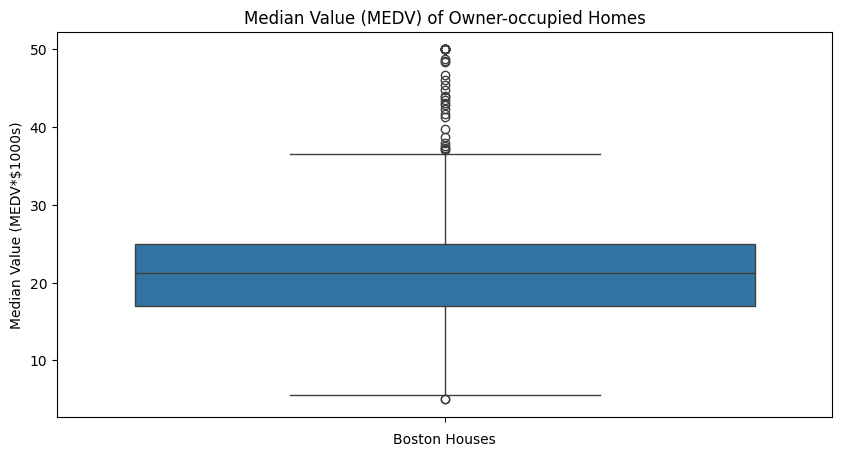

In [41]:
# Create boxplot

plt.figure(figsize=(10,5))
sns.boxplot(y=df.MEDV)
plt.title("Median Value (MEDV) of Owner-occupied Homes")
plt.xlabel('Boston Houses')
plt.ylabel('Median Value (MEDV*$1000s)')
plt.show()

In [44]:
# Key descriptive statistics from the boxplot
q1 = df['MEDV'].quantile(0.25)
q2 = df['MEDV'].median()
q3 = df['MEDV'].quantile(0.75)
iqr = q3 - q1
min = q1 - 1.5 * iqr
max = q3 + 1.5 * iqr

print(f"Q1={q1:.2f}, Q2 = {q2:.2f}, Q3={q3:.2f}, IQR={iqr:.2f}, MIN={min:.2f}, MAX={max:.2f}")

Q1=17.02, Q2 = 21.20, Q3=25.00, IQR=7.98, MIN=5.06, MAX=36.96


#### Observation:
* The boxplot clearly shows that there are outliers in the MEDV data, a few low the minimum and many above the maximum value range of the whisker.
* Key features of the plot: Q1=17.02, Q2 = 21.20, Q3=25.00, IQR=7.98, MIN=5.06, MAX=36.96.

### Bar plot for the Charles River with tract bound by river or not

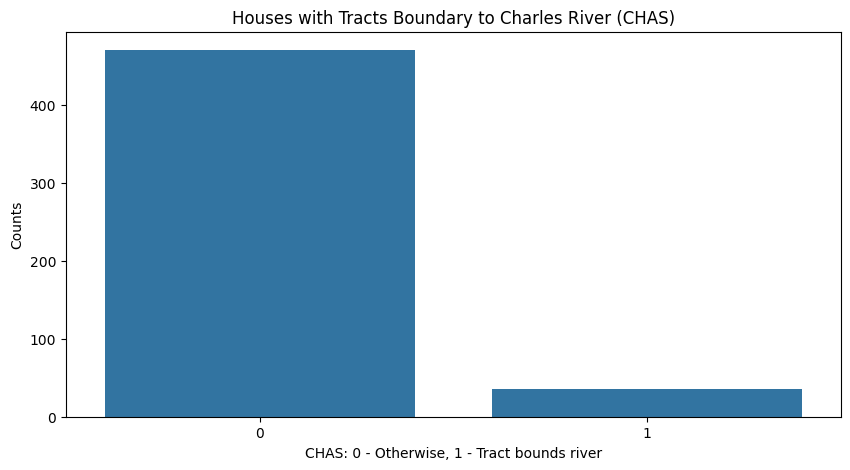

In [32]:
# Bar plot for the Charles River variable

# Create bar graph
plt.figure(figsize=(10,5))
sns.countplot(x='CHAS', data=df)

# Replace numeric X-axis values with names
plt.xticks(ticks=[0, 1], labels=['0', '1'])

# Add labels and title
plt.title('Houses with Tracts Boundary to Charles River (CHAS)')
plt.xlabel('CHAS: 0 - Otherwise, 1 - Tract bounds river')
plt.ylabel('Counts')

# Show plot
plt.show()

In [35]:
df['CHAS'].value_counts()

CHAS
0    471
1     35
Name: count, dtype: int64

#### Observation:
* The barplot clearly shows that the number of houses with tracts boundary to Charles river are greatly fewer than those that are not.
* Houses boudary to Charles river are 35 and others are 471.

### Boxplot of Median Value of Owner Occupied Homes by Age Groups

In [36]:
# Provide a boxplot for the MEDV variable vs the AGE variable in 3 groups: 
# Discretize AGE into three groups (years): <=35, between 35 and 70, and =>70)

# Create and assign groups
df.loc[df["AGE"] <= 35, 'age_group'] = '<= 35'
df.loc[(df["AGE"] > 35) & (df["AGE"] < 70), 'age_group'] = '>35 and <70'
df.loc[df["AGE"] >= 70, 'age_group'] = '=>70'

# Define group order
age_order = ['=>70', '>35 and <70', '<= 35', ]

# Convert to ordered categorical
df['age_group'] = pd.Categorical(df['age_group'], categories=age_order, ordered=True)

# Sort by age_group
df_sorted = df.sort_values('age_group')

df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV,age_group
ID,,,,,,,,,,,,,,
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,4.98,24.0,>35 and <70
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,9.14,21.6,=>70
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,4.03,34.7,>35 and <70
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,2.94,33.4,>35 and <70
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,5.33,36.2,>35 and <70
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273.0,21.0,9.67,22.4,>35 and <70
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273.0,21.0,9.08,20.6,=>70
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273.0,21.0,5.64,23.9,=>70


In [37]:
df["age_group"].value_counts()

age_group
=>70           287
>35 and <70    128
<= 35           91
Name: count, dtype: int64

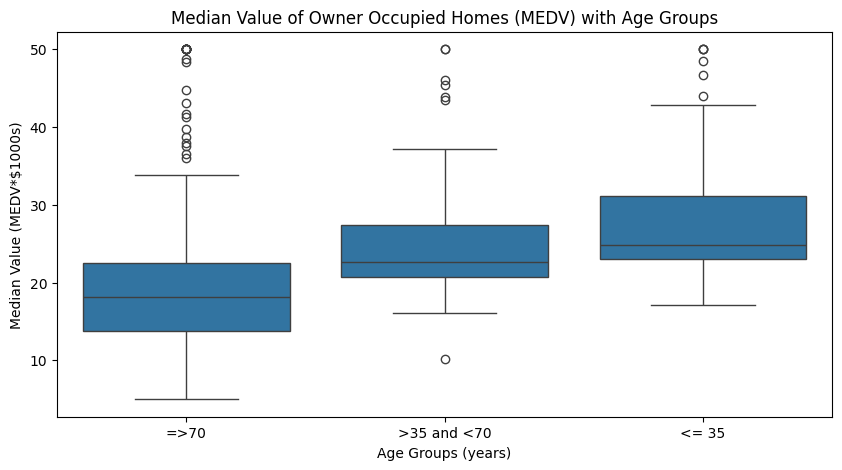

In [43]:
# Create boxplot

plt.figure(figsize=(10,5))
sns.boxplot(x=df.age_group, y=df.MEDV, data=df)
plt.title('Median Value of Owner Occupied Homes (MEDV) with Age Groups')
plt.xlabel('Age Groups (years)')
plt.ylabel('Median Value (MEDV*$1000s)')

plt.show()

In [86]:
# Key descriptive statistics from the boxplot
summary = (df
           .groupby('age_group')['MEDV']
           .agg(
               Q1=lambda s: s.dropna().quantile(0.25),
               Q2='median',
               Q3=lambda s: s.dropna().quantile(0.75))
           .assign(IQR=lambda d: d['Q3'] - d['Q1']).round(2))

print(summary)

<ipython-input-86-c9505ec3a236>:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  .groupby('age_group')['MEDV']


                Q1    Q2     Q3   IQR
age_group                            
=>70         13.80  18.2  22.55  8.75
>35 and <70  20.68  22.6  27.42  6.75
<= 35        23.05  24.8  31.15  8.10


#### Observation:
* The barplots clearly shows that the median values of houses vary with age group.
* The median values of the houses decreases with increasing age group.
* There were also some outliers that were above the upper whisker for all age groups.
* There is one outlier below the lower whisker for the age groups between 35 and 70 years.

### Scatter plot to showing the relationship between Nitric oxide concentrations and the proportion of non-retail business acres per town

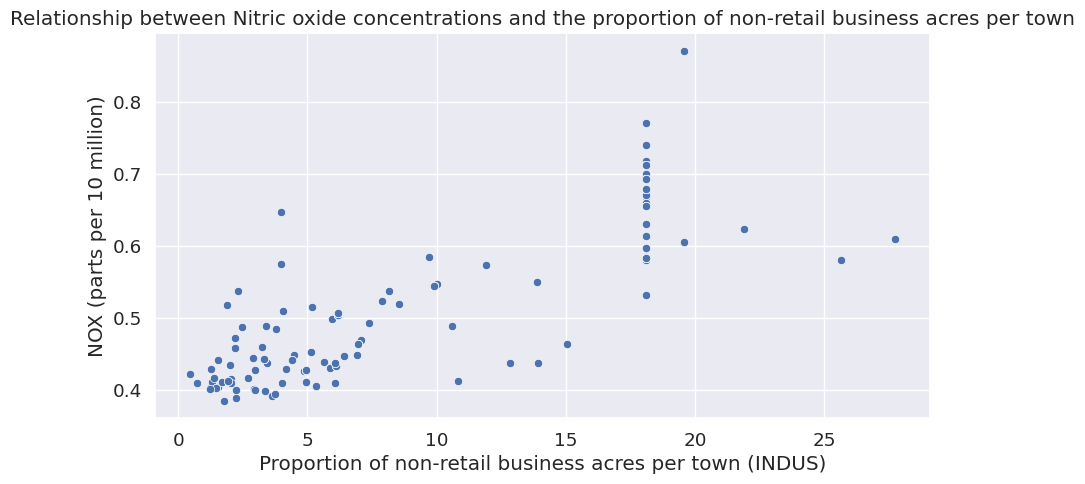

In [426]:
# Scatter plot to show the relationship between Nitric oxide concentrations and 
# the proportion of non-retail business acres per town, plus my observation on the relationship?

plt.figure(figsize=(10,5))
sns.scatterplot(x=df.INDUS, y=df.NOX, data=df)
plt.title('Relationship between Nitric oxide concentrations and the proportion of non-retail business acres per town')
plt.xlabel('Proportion of non-retail business acres per town (INDUS)') # Independent variable
plt.ylabel('NOX (parts per 10 million)') # Dependent variable
plt.show()

### Observation:

* There seems to be a pattern in an upward linear fashion i.e., NOX increases with increasing proportion of non-retail business acres per town
* Many more non-retail business acres per town with smaller proportions are concentrated between 1 and 10 acres per town and then further dispersed at higher proportions
* Non retail business scres per town at proportion of 19 have higher NOX concentration
* Non retail business scres per town at proportions of 20 have highest NOX concentration

### Histogram showing the distribution for the pupil to teacher ratio by town

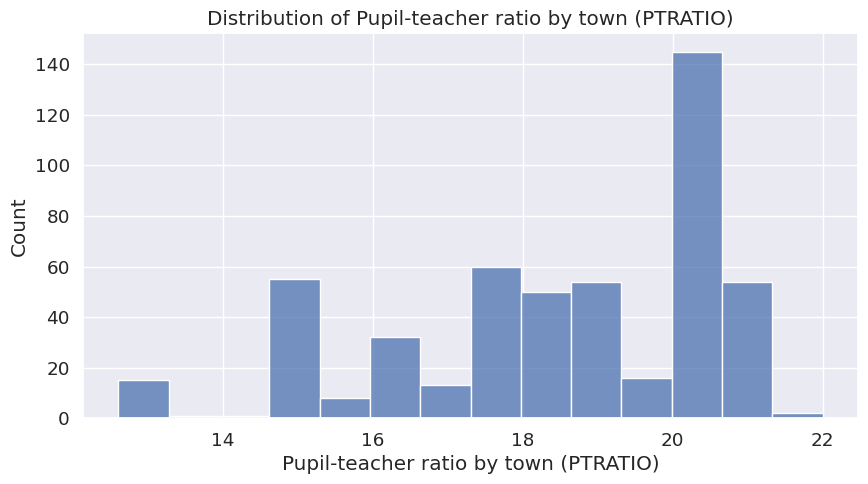

In [427]:
# Histogram for the pupil to teacher ratio variable

plt.figure(figsize=(10,5))
sns.histplot(x='PTRATIO', data=df)
plt.title("Distribution of Pupil-teacher ratio by town (PTRATIO)")
plt.xlabel('Pupil-teacher ratio by town (PTRATIO)')
plt.ylabel('Count')
plt.show()

### Observation:

* Pupil-teacher ratio by town is not normally distributed but left (negatively) skewed.
* There is clearly a large count for the PTRATIO at around 20-21.

## Task 3: Inferential Statistics

### Impact of tract boundary to Charles river (CHAS) on median value of houses (MEDV)

#### Objective:
* To determine if median value of houses (MEDV) bounded by the Charles river (CHAS) or not, significantly differ (using independent T-test).

#### Hypothesis:
* H₀: MEDV does not differ by tract boundary to Charles river (CHAS)
* H₁: MEDV differs by tract boundary to Charles river (CHAS)

#### Decision rule:
* alpha = 0.05
* if p_value < alpha (α):
    print("Reject the null hypothesis (H₀)")
* else:
    print("Fail to reject the null hypothesis (H₀)")

In [428]:
# Is there a significant difference in median value of houses bounded by the Charles river or not?
# (T-test for independent samples)

Riverbound = df[df["CHAS"] == 1]["MEDV"]
Others = df[df["CHAS"] == 0]["MEDV"]
a=Riverbound
b=Others
print(f"Riverbound Houses: {len(a)}, Others: {len(b)}")
scipy.stats.ttest_ind(a,b,axis=0,equal_var=True)

Riverbound Houses: 35, Others: 471


TtestResult(statistic=3.996437466090509, pvalue=7.390623170519905e-05, df=504.0)

#### Inference: 
* p-value < α, hence, we reject H₀
#### Conclusion:
* The median value of houses (MEDV) bounded by the Charles river (CHAS) significantly differ from those that are not.

### Difference in median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE)

#### Objective:
* To determine if median values of houses (MEDV) differ by proportion of owner occupied units built prior to 1940 (AGE) (using One-way ANOVA)

#### Hypothesis:
* H₀: MEDV does not defer by AGE
* H₁: MEDV defers by AGE

#### Decision rule:
* alpha = 0.05
* if p_value < alpha (α):
    print("Reject the null hypothesis (H₀)")
* else:
    print("Fail to reject the null hypothesis (H₀)")

In [429]:
# Define the groups

df.loc[df["AGE"] <= 35, 'age_group'] = '<= 35'
df.loc[(df["AGE"] > 35) & (df["AGE"] < 70), 'age_group'] = '>35 and <70'
df.loc[df["AGE"] >= 70, 'age_group'] = '=>70'

low = df[df["age_group"] == '<= 35']["MEDV"]
med = df[df["age_group"] == '>35 and <70']["MEDV"]
high = df[df["age_group"] == '>= 70']["MEDV"]

print(df["age_group"].value_counts())

# Perform one-way ANOVA
scipy.stats.f_oneway(df['MEDV'], df['AGE']<1940)

age_group
=>70           287
>35 and <70    128
<= 35           91
Name: count, dtype: int64


F_onewayResult(statistic=2773.6367436431683, pvalue=6.382268825094399e-292)

#### Inference: 
* p-value < α, hence, we reject H₀
#### Conclusion:
* The median value of houses (MEDV) differ by differ by proportion of owner occupied units built prior to 1940 (AGE).

### Relationship between Nitric oxide concentrations and proportion of non-retail business acres per town

#### Objective:
* Can we conclude that there is no relationship between Nitric oxide concentrations (NOX) and proportion of non-retail business acres per town (INDUS)? (using Pearson Correlation)

#### Hypothesis:
* H₀: No correlation between NOX and INDUS
* H₁: There is correlation between NOX and INDUS

#### Decision rule:
* alpha = 0.05
* if p_value < alpha (α):
    print("Reject the null hypothesis (H₀)")
* else:
    print("Fail to reject the null hypothesis (H₀)")

In [430]:
# Apply Pearson correlation

scipy.stats.pearsonr(boston_df['NOX'], boston_df['INDUS'])

PearsonRResult(statistic=0.7636514469209192, pvalue=7.913361061210442e-98)

#### Inference: 
* Correlation coefficient = 0.7637 (positive)
* p-value < α, hence, we reject H₀
#### Conclusion:
* There is a relationship (significant positive correlation) between Nitric oxide concentrations (NOX) and the proportion of non-retail business acres per town (INDUS).

### Impact of an additional weighted distance to the five Boston employment centres on the median value of owner occupied homes

#### Objective:
* To determine if an additional weighted distance to the five Boston employment centres has an impact on the median value of owner occupied homes

#### Hypothesis:
* H₀: An additional weighted distance to the five Boston employment centres impacts MEDV
* H₁: An additional weighted distance to the five Boston employment centres does not impact MEDV

#### Decision rule:
* alpha = 0.05
* if p_value < alpha (α):
    print("Reject the null hypothesis (H₀)")
* else:
    print("Fail to reject the null hypothesis (H₀)")

In [431]:
X = df['DIS']
y = df['MEDV']

X = sm.add_constant(X)
model = sm.OLS(y, X).fit()

predictions = model.predict()

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Mon, 18 Aug 2025   Prob (F-statistic):           1.21e-08
Time:                        16:08:54   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:                             3660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.3901      0.817     22.499      0.000      16.784      19.996
DIS            1.0916      0.188      5.795      0.000       0.722       1.462
==============================================================================
Omnibus:                      139.779   Durbin-Watson:                   0.570
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              305.104
Skew:                           1.466   Prob(JB):                     5.59e-67
Kurtosis:                       5.424   Cond. No.                         9.32
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### Inference: 
* p-value < α, hence, we reject H₀
* R^2 = 0.062 (Low confidence, not so reliable)
#### Conclusion:
* An additional weighted distance to the five Boston employment centres has an impact on the median value of owner occupied homes. However, there is less confidence or reliability on this prediction due to due low R^2 value (0.062).

### Author:
#### Dr. OMA